In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
fname="Jelgava_2017-2021_t_p_def.xls"
df=pd.read_excel(fname,parse_dates=["Datums \ Laiks"],index_col=0)
df=df.reindex(columns=["vidējais sniega segas biezums, cm","summa","dienas vidējā temperatūra, C","vidējais relatīvais mitrums"])
df

,"vidējais sniega segas biezums, cm",summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums
Datums \ Laiks,,,,
2017-01-01,0.000000,0.2,6.016667,94.000000
2017-01-02,0.166667,0.8,0.800000,95.500000
2017-01-03,0.291667,0.0,-2.641667,89.583333
2017-01-04,6.750000,4.0,-4.291667,88.958333
2017-01-05,7.375000,0.2,-13.229167,68.000000
...,...,...,...,...
2021-12-27,10.000000,0.0,-3.950000,89.083333
2021-12-28,9.125000,0.0,-8.379167,90.000000
2021-12-29,9.000000,0.0,-7.241667,72.000000


In [3]:
window_size=12
for i in range(1, window_size):
    df[f'summa_{i}'] = df['summa'].shift(i)
    df[f'dvt_{i}'] = df['dienas vidējā temperatūra, C'].shift(i)
    df[f'vrm_{i}'] = df['vidējais relatīvais mitrums'].shift(i)
    
df=df.dropna()


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
46/46 [==============================] - 1s 4ms/step - loss: 18.7561 - accuracy: 0.4252
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 5.8592 - accuracy: 0.4852
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 4.2418 - accuracy: 0.5210
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 3.4265 - accuracy: 0.5417
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 3.4245 - accuracy: 0.5472
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 3.0644 - accuracy: 0.5424
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 2.9169 - accuracy: 0.5624
Epoch 8/20
46/46 [==============================] - 0s 4ms/step - loss: 2.6535 - accuracy: 0.5727
Epoch 9/20
46/46 [==============================] - 0s 4ms/step - loss: 2.5607 - accuracy: 0.5762
Epoch 10/20
46/46 [==============================] - 0s 4ms/step - loss: 2.7675 - accuracy: 0.5513
Epoch 11/20
46/46 

In [11]:
test_loss = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 1.5627 - accuracy: 0.8457


In [13]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


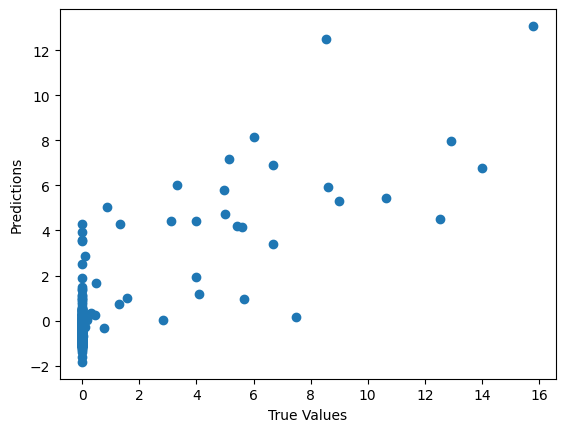

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [15]:
y_pred = model.predict(X)

57/57 [==============================] - 0s 3ms/step


In [16]:
df["snowcover_predicted"]=y_pred

C:\Users\didzis\AppData\Local\Temp\ipykernel_16868\4223927865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["snowcover_predicted"]=y_pred


C:\Users\didzis\AppData\Local\Temp\ipykernel_16868\4291089447.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017"])


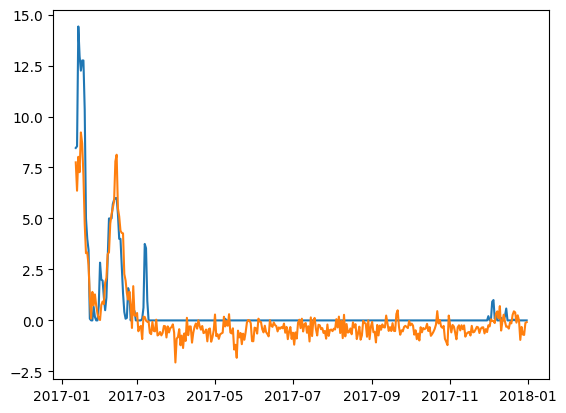

In [17]:
plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017"])